isPositive: True
isPositive: False
isPositive: False
isPositive: True
isPositive: True
min x: 9000.0, max x: 11000.0
line: A: 0, B: -1000, C: -10000000


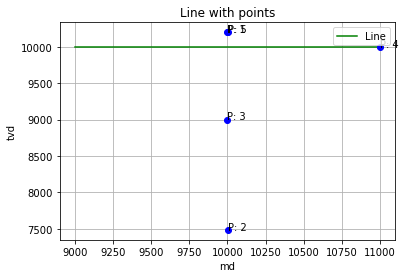

In [114]:
import matplotlib.pyplot as plt
import numpy as np

class Line:
    def __init__(self, A, B, C):
        self.A = A
        self.B = B
        self.C = C
    
    @staticmethod
    def from_two_points(x1, y1, x2, y2):
        if x1 == x2:  # Avoid division by zero
            return Line(1, 0, x1)
        A = -(y2 - y1)
        B = x2 - x1
        C = A * x1 + B * y1
        return Line(A, B, C)

    @staticmethod
    def from_angle_point(angle, px, py):
        if abs(angle - 90) < 0.01 or abs(angle + 90) < 0.01:
            A = 1
            B = 0
            C = -px
        else:
            # Convert angle from degrees to radians
            angle_rad = np.deg2rad(angle)
            A = np.tan(angle_rad)
            B = -1
            C = py - A * px
        return Line(A, B, C)

    def is_positive_side(self, x, y):
        # If the value of A*x + B*y - C is greater or equal to zero, 
        # the point lies on the positive side of the line
        return (self.A * x + self.B * y - self.C) >= 0

points = [
    (9999.000000001313, 10199.8134765625),
    (10002.000000001324, 7486.134356717739),
    (10000, 9000),
    (11000, 10000),
    (10002.000000001324, 10199.5546875)
]

# Print whether each point is on the positive side of the line
for md, tvd in points:
    print(f'isPositive: {line.is_positive_side(md, tvd)}')

# Plot the line
x = np.linspace(8000, 11000, 10)
print(f'min x: {min(x)}, max x: {max(x)}')

###
# Initialize the line with the given coefficients

# A vertical line at x = 10000
#line = Line(1, 0, -10000)
#line = Line(1, 0, -10001.00000000132)

# a horizontal line
#line = Line(-0.5587890625, -3.400000000010914, -34187.07226573666)
#surfaceLine
#line = Line(-0.2587890625, -3.000000000010914, -33187.07226573666)


#line = Line(-57.28996163075955, 1.0, 580500.3305876505)
#line = Line.from_angle_point(45, 9000, 10000)
#line = Line.from_angle_point(45, 10000, 9000)

line = Line.from_two_points(10000, 10000, 9000, 10000)
print(f'line: A: {line.A}, B: {line.B}, C: {line.C}')
###

# If B is not zero, compute y normally. Otherwise, draw a vertical line.
if line.B != 0:
    y = (line.C - line.A * x) / line.B
    plt.plot(x, y, '-g', label='Line')
else:
    plt.axvline(x=-line.C / line.A, color='r', label='Line')

# Plot the points and label them
for i, (md, tvd) in enumerate(points):
    plt.plot(md, tvd, 'bo')
    plt.text(md, tvd, f'P: {i + 1}')

plt.title('Line with points')
plt.xlabel('md')
plt.ylabel('tvd')
plt.legend(loc='best')
plt.grid()

# Set the y-axis limits to properly display the points
#plt.ylim(7000, 11000)

plt.show()
